<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Ucr =  7


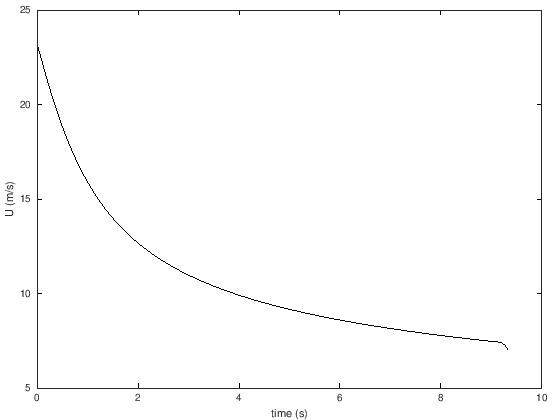

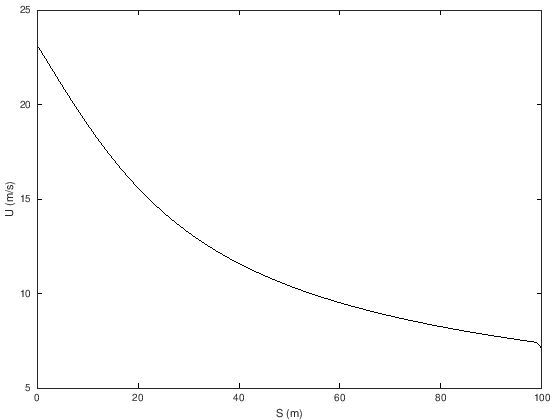

In [30]:
clear all
mu = 1.0;
g = 9.8;


Kcr = 1/5;%radius of the constant radius segment
c = .03;

%this line will be replaced with SS cornering as appropriate
Ucr = sqrt(mu*g/Kcr);%speed at the CR segment

Ucr%start at the apex
ds = .1;%integration timestep

Svec = 0:ds:100;%20 will correspond with the beginning of the CR segment
Uvec = zeros(size(Svec));
Uvec(end) = Ucr;

for k = (length(Svec)-1):-1:1
    dUdS = 1/Uvec(k+1)*sqrt((mu*g)^2 - (2*c^2*Svec(k+1)*Uvec(k+1)^2)^2);%find derivative duds now.
    Uvec(k) = Uvec(k+1) + (Svec(k+1)-Svec(k))*dUdS;
end

plot(Svec,Uvec,'k')
xlabel('S (m)')
ylabel('U (m/s)')


%simulate as a function of time.
Snow = 0;
Sdotnow = Uvec(1);
dt = 0.01;
Svecnew = Snow;
Uvecnew = Uvec(1);
tvec = 0;

while Snow <=Svec(end)
    Sdotnow = interp1(Svec,Uvec,Snow);%find what speed we're s'posed to be at now.
    Snow = Svecnew(end)+Sdotnow*dt;
    Svecnew = [Svecnew; Snow];
    Uvecnew = [Uvecnew; Sdotnow];
    tvec = [tvec; tvec(end)+dt];
end


figure
plot(tvec,Uvecnew,'k')
xlabel('time (s)')
ylabel('U (m/s)')